# **SIMULADOR CORREO ELECTRÓNICO - MIGUEL LABRADOR**



Aquí presento mi trabajo práctico para la construcción de un código que simule una plataforma de correo electrónico. Para poder emular la plataforma de correo electrónico es necesario subir los archivos *database.txt* y *users_pwd.xlsx*.

Pymail es una plataforma interna para enviar correos electrónicos de una empresa logística. La plataforma permite realizar las siguientes funciones y, además, solo puede enviar correos a usuarios (la longitud de los usuarios es siempre inferior a veinte caracteres) que utilicen el dominio *@pymail.com*:

- Enviar correos
-Listar la bandeja de entrada
-Eliminar correos
-Visualizar correos
-Buscar correos
-Marcar correos como leídos
-Responder correos
-Reenviar correos
-Listar la bandeja de salida
-Salir

A continuación, se muestra un pantallazo de los usuarios disponibles en el fichero excel.

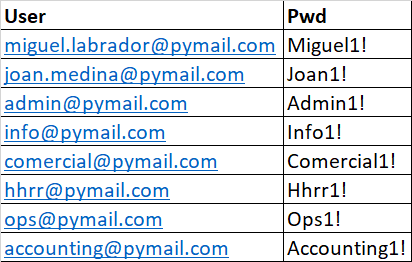






# **Función Log-in**
Carga la base de datos de usuarios y contraseñas de la empresa

In [5]:
pip install openpyxl

In [6]:
from openpyxl import load_workbook # La librería openpyxl nos permite analizar datos en las celdas de un archivo excel

In [7]:
# Cargar el documento con los usuarios y contraseñas
users_path = 'users_pwd.xlsx'
wb = load_workbook(users_path)
sheet = wb.active

# La función login verifica si el usuario y la contraseña están en la base de datos de usuarios y ambas en la misma fila
def login(username, password):
    for row in sheet.iter_rows(min_row=2, values_only=True): # Min_row=2 ya que la fila 1 contiene el encabezado
        if row[0] == username and row[1] == password:
            return True
    return False

# **Función user verifier**
Verifica si un email cumple las reglas impuestas de la plataforma.
  - Longitud user < 20 char
  - Único dominio: *@pymail.com*

In [8]:
# La función user_verifier comprueba si un correo cumple los requisitos o no.
def user_verifier(user_name):
    if '@' in user_name:
      split_user_name = user_name.split('@')
      if len(split_user_name[0]) <= 20 and split_user_name[1] == 'pymail.com' and user_name[-11] == '@': # Cuando el usuario creó su mail se le limitó a 20 carácteres su nombre de usuario. Solo hay un único dominio: pymail.com

        return True

# **Función enviar correo**
Crea un dict verificando los mails y posteriormente hace el unpack posteándolo en la database de mails

In [9]:
# La función send_mail ennvía un correo eléctronico al destinatario deseado registrando además el Asunto y el Cuerpo
def send_mail(email_adress, database):

    sender = email_adress
    email2send = [] # Lista vacía a la que incorporamos el correo a enviar

    while True:
      receiver = input('Escriba la dirección email del destinatario: ')
      if user_verifier(receiver): # Comprobamos si el mail del destinatarios cumple los requisitos
        subject = input('Escriba el asunto del email: ')
        body = input('Escriba el cuerpo del email: ')
        email = {
            'Emisor': sender,
            'Destinatario': receiver,
            'Asunto': subject,
            'Cuerpo': body,
            'Estado': 'No leído'
        }
        email2send.append(email)
        print('\nCorreo enviado exitosamente')
        break
      else:
        print('La dirección email introducida no existe')

    return email2send

# **Función bandeja de entrada**
Crea una list de dicts verificando que el destinatario del mail sea el user que se logueó.

In [10]:
# La función inbox muestra la bandeja de entrada del usuario (Emisor y Asunto)
def inbox(email_adress, database):

    bandeja_de_entrada = [] # Lista vacía a la que incorporamos los correos de la bandeja de salida

    with open(database, 'r') as file:
      lines = file.readlines() # lines es una list de str en la que cada elemento es una línea de la database

      for i in range(1, len(lines), 6):
        if lines[i].split()[1] == email_adress: # Comprueba que el destinatario del email es el usuario loggueado
          correo = {
              'Emisor': lines[i-1].split()[1],
              'Asunto': lines[i+1].replace('Asunto: ', '').strip(),
              'Estado': lines[i+3].replace('Estado: ', '').strip()
          }
          bandeja_de_entrada.append(correo)

      return bandeja_de_entrada


# **Función eliminar mail de la bandeja de entrada**
Compara dos list (bandeja de entrada y base de datos) y elimina el mail en la base de datos que el usuario indica de la bandeja de entrada

In [11]:
# La función pop_inbox elimina un email de la bandeja de entrada
def pop_inbox(email_adress, database):

    base_de_datos = [] # Lista vacía a la que incorporamos todos los correos de la database
    bandeja_de_entrada = bandeja_de_entrada_completa(email_adress, database) # Lista de correos con todos los campos del usuario loggueado

    with open(database, 'r') as file:
      lines = file.readlines() # lines es una list de str en la que cada elemento es una linea de la database

    for i in range(1, len(lines), 6):
      correo_2 = {
          'Emisor': lines[i-1].split()[1],
          'Destinatario': lines[i].split()[1],
          'Asunto': lines[i+1].replace('Asunto: ', '').strip(),
          'Cuerpo': lines[i+2].replace('Cuerpo: ', '').strip(),
          'Estado': lines[i+3].replace('Estado: ', '').strip()
      }
      base_de_datos.append(correo_2)

    while True:
      print('Seleccione un número para eliminar un correo de su bandeja de entrada siendo 0 el primero de la lista')
      print('Si todavía no ha visto su bandeja de entrada por favor escriba menú para ver su bandeja')
      pop_index = input()

      if pop_index.isdigit(): # Devuelve True si el input es un número
        pop_index = int(pop_index)
        if 0 <= pop_index < len(bandeja_de_entrada): # Valoramos si el input está asociado a algún mail
          mail_to_pop = bandeja_de_entrada.pop(pop_index)
          base_de_datos = [mail for mail in base_de_datos if mail != mail_to_pop] # Crea una lista con todos los mails salvo el mail a eliminar de los usuarios que posteriormente se reescribirá en la database
          print('\n**********')
          print('Correo eliminado exitosamente')
          print('**********\n')
          break
        else:
          print('\n**********')
          print('El número no corresponde a ningún correo de la lista. Si quiere volver al menú escriba: menú')
          print('**********\n')
      elif pop_index.lower() in ['menú', 'menu']: # Sirve como botón de "atrás"
        break
      else:
        print('\n**********')
        print('Por favor ingrese un número para eliminar un correo de su bandeja de entrada o escriba menú para volver atrás')
        print('**********\n')

    return base_de_datos

In [12]:
# La función bandeja_de_entrada_completa genera una bandeja de entrada con todos los campos del correo electrónico
def bandeja_de_entrada_completa(email_adress, database):

    bandeja_de_entrada = []

    with open(database, 'r') as file:
      lines = file.readlines() # lines es una list de str en la que cada elemento es una linea de la database

    for i in range(1, len(lines), 6):
      if lines[i].split()[1] == email_adress:
        correo = {
            'Emisor': lines[i-1].split()[1],
            'Destinatario': lines[i].split()[1],
            'Asunto': lines[i+1].replace('Asunto: ', '').strip(),
            'Cuerpo': lines[i+2].replace('Cuerpo: ', '').strip(),
            'Estado': lines[i+3].replace('Estado: ', '').strip()
        }
        bandeja_de_entrada.append(correo)

    return bandeja_de_entrada

#**Función ver correo al completo**
Muestra un correo llamando a la función bandeja de entrada en base al índice que el usuario indica

In [13]:
# La función view_mail muestra todos los campos de un mail seleccionado de la bandeja de entrada
def view_mail(email_adress, database):

    print('Seleccione un número para ver un correo de su bandeja de entrada siendo 0 el primero de la lista')
    print('Si todavía no ha visto su bandeja de entrada por favor escriba menú para ver su bandeja')

    while True:
      view_index = input()
      print('\n')
      bandeja_de_entrada = bandeja_de_entrada_completa(email_adress, database)
      if view_index.isdigit(): # Devuelve True si el input es un número
        view_index = int(view_index)
        if 0 <= view_index < len(bandeja_de_entrada): # Valoramos si el input está asociado a algún mail
          mail2see = bandeja_de_entrada[view_index]

          return mail2see

        else:
          print('\n**********')
          print('El número no corresponde a ningún correo de la lista. Si quiere volver al menú escriba: menú')
          print('**********\n')
      elif view_index.lower() in ['menú', 'menu']: # Sirve como botón de "atrás"
        break
      else:
        print('\n**********')
        print('Por favor ingrese un número para ver un correo de su bandeja de entrada o escriba menú para volver atrás')
        print('**********\n')


# **Función búsqueda por palabra**
Muestra los correos filtrando la bandeja de entrada según la palabra introducida llamando a la función bandeja de entrada completa

In [14]:
def search_by_key_word(email_adress, database):

    while True:
      key_word = input()
      print('\n')

      bandeja_de_entrada_filtrada = [] # Lista vacía a la que incorporamos los correos que contengan la palabra introducida

      if key_word.isalpha(): # Devuelve True si el input es una palabra
        for mail in bandeja_de_entrada_completa(email_adress, database):
          for k, v in mail.items():
            if key_word.lower() in v.lower(): # Evaluamos todo en minúsculas para mitigar errores
              bandeja_de_entrada_filtrada.append(mail)
              break
        if not bandeja_de_entrada_filtrada: # Devuelve True si la lista esta vacía
          print('**********')
          print('No se ha encontrado ningún correo con la palabra introducida.')
          print('**********\n')
        break
      else:
        print('**********')
        print('Por favor introduzca una palabra.')
        print('**********\n')

    return bandeja_de_entrada_filtrada

# **Función marcar como Leído**
Compara dos list (bandeja de entrada y base de datos) y marcar el mail como leído en la base de datos que el usuario indica de la bandeja de entrada

In [15]:
def mark_as_read(email_adress, database):

    base_de_datos = [] # Lista vacía a la que incorporamos todos los correos de la database

    with open(database, 'r') as file:
      lines = file.readlines()

    for i in range(1, len(lines), 6):
      correo_2 = {
          'Emisor': lines[i-1].split()[1],
          'Destinatario': lines[i].split()[1],
          'Asunto': lines[i+1].replace('Asunto: ', '').strip(),
          'Cuerpo': lines[i+2].replace('Cuerpo: ', '').strip(),
          'Estado': lines[i+3].replace('Estado: ', '').strip()
      }
      base_de_datos.append(correo_2)

    while True:
      print('Seleccione un número para eliminar un correo de su bandeja de entrada siendo 0 el primero de la lista')
      print('Si todavía no ha visto su bandeja de entrada por favor escriba menú para ver su bandeja')
      bandeja = bandeja_de_entrada_completa(email_adress, database)
      read = input()

      if read.isdigit(): # Devuelve True si el input es un número
        read = int(read)
        if 0 <= read < len(bandeja): # Valoramos si el input está asociado a algún mail
          mail_read = bandeja[read]
          for mail in base_de_datos:
            if mail_read == mail: #
              mail['Estado'] = 'Leído' # Marcamos el mail como leído si el mail de la bandeja de entrada seleccionado es igual al de la base de datos
              print('\n**********')
              print('Correo marcado como leído exitosamente')
              print('**********\n')
          break
        else:
          print('\n**********')
          print('El número no corresponde a ningún correo de la lista. Si quiere volver al menú escriba: menú')
          print('**********\n')
      elif read.lower() in ['menú', 'menu']: # Sirve como botón de "atrás"
        break
      else:
        print('\n**********')
        print('Por favor ingrese un número para marcar un correo de su bandeja de entrada como leído o escriba menú para volver atrás')
        print('**********\n')

    return base_de_datos

# **Función responder correo**
Genera un correo de vuelta según el índice de la bandeja de entrada indicado

In [16]:
def reply_mail(email_adress, database):

    email2reply = [] # Lista vacía a la que incorporamos el mail que vamos a responder

    while True:
      print('Seleccione un número para responder un correo de su bandeja de entrada siendo 0 el primero de la lista')
      print('Si todavía no ha visto su bandeja de entrada por favor escriba menú para ver su bandeja')
      bandeja = inbox(email_adress, database)

      index_mail = input()
      if index_mail.isdigit(): # Devuelve True si el input es un número
        index_mail = int(index_mail)
        if 0 <= index_mail < len(bandeja): # Valoramos si el input está asociado a algún mail
          mail2answer = bandeja[index_mail]
          body = input('Escriba el cuerpo del email: ')
          correo = {
              'Emisor': email_adress,
              'Destinatario': mail2answer['Emisor'],
              'Asunto': mail2answer['Asunto'],
              'Cuerpo': body,
              'Estado': 'No leído'
          }
          email2reply.append(correo)
          print('\n**********')
          print('Correo enviado exitosamente')
          print('**********\n')
          break
        else:
          print('\n**********')
          print('El número no corresponde a ningún correo de la lista. Si quiere volver al menú escriba: menú')
          print('**********\n')
      elif index_mail.lower() in ['menú', 'menu']: # Sirve como botón de "atrás"
        break
      else:
        print('\n**********')
        print('Por favor ingrese un número para marcar un correo de su bandeja de entrada como leído o escriba menú para volver atrás')
        print('**********\n')

    return email2reply

# **Función reenviar correo**
Reenvía un correo al usuario introducido según el índice de la bandeja de entrada indicado

In [17]:
def forward_mail(email_adress, database):

    email2forward = [] # Lista vacía a la que incorporamos el mail que vamos a reenviar

    while True:
      print('Seleccione un número para reenviar un correo de su bandeja de entrada siendo 0 el primero de la lista')
      print('Si todavía no ha visto su bandeja de entrada por favor escriba menú para ver su bandeja')
      bandeja = bandeja_de_entrada_completa(email_adress, database)

      index_mail = input()
      if index_mail.isdigit(): # Devuelve True si el input es un número
        index_mail = int(index_mail)
        if 0 <= index_mail < len(bandeja): # Valoramos si el input está asociado a algún mail
          mail2forward = bandeja[index_mail]
          dest = input('Escriba el destinatario al que desea reenviar el email: ')
          if user_verifier(dest): # Comprobamos si el mail del destinatarios cumple los requisitos
            correo = {
                'Emisor': email_adress,
                'Destinatario': dest,
                'Asunto': mail2forward['Asunto'],
                'Cuerpo': mail2forward['Cuerpo'],
                'Estado': 'No leído'
            }
            email2forward.append(correo)
            print('\n**********')
            print('Correo enviado exitosamente')
            print('**********\n')
            break
          else:
            print('\n**********')
            print('La dirección email introducida no existe')
            print('**********\n')
        else:
          print('\n**********')
          print('El número no corresponde a ningún correo de la lista. Si quiere volver al menú escriba: menú')
          print('**********\n')
      elif index_mail.lower() in ['menú', 'menu']: # Sirve como botón de "atrás"
        break
      else:
        print('\n**********')
        print('Por favor ingrese un número para marcar un correo de su bandeja de entrada como leído o escriba menú para volver atrás')
        print('**********\n')

    return email2forward

# **Función bandeja de salida**
Crea una list de dicts verificando que el emisor del mail sea el user que se logueó.

In [18]:
def outbox(email_adress, database):

    bandeja_de_salida = [] # Lista vacía a la que incorporamos los correos de la bandeja de entrada

    with open(database, 'r') as file:
      lines = file.readlines() # lines es una list de str en la que cada elemento es una linea de la database

      for i in range(0, len(lines), 6):
        if lines[i].split()[1] == email_adress: # Comprueba que el emisor del email es el usuario loggueado
          correo = {
              'Destinatario': lines[i+1].split()[1],
              'Asunto': lines[i+2].replace('Asunto: ', '').strip()
          }
          bandeja_de_salida.append(correo)

      return bandeja_de_salida

# **Función main**
Función matriz en la que ejecutamos el correo electrónico llamando a otras funciones.

*Antes de ejecutar la función main es necesario ejecutar el resto de funciones: Runtime -> Run all o Ctrl + F9*

In [19]:
def main():

    print('¡Bienvenido a Pymail! Para iniciar sesión por favor ingrese sus datos a continuación.')

    database = 'database.txt' # Fichero .txt que almacena todos los correos de los diferentes usuarios

    while True:
      email_adress = input('Introduzca su dirección email: ')
      password = input('Introduzca su contraseña: ')
      if login(email_adress, password): # Si usuarios y contraseña son correctos rompemos el bucle while simulando el acceso a la plataforma
        print('\nIniciando sesión...')
        break
      else:
        print('\nLas credenciales no son correctas\n')

    while True:
      # Mostrar menú
      print("\n== Menú de Correo Electrónico ==")
      print("1. Enviar Correo")
      print("2. Listar Bandeja de Entrada")
      print("3. Eliminar Correo")
      print("4. Leer Correo Electrónico")
      print("5. Buscar Correos")
      print("6. Marcar Correos como Leídos")
      print("7. Responder a un Correo")
      print("8. Reenviar Correo")
      print("9. Listar Bandeja de Salida")
      print("10. Salir")

      # Uso de try y except para permanecer en el bucle si se introduce un carácter no deseado
      try:
        menu_choice = int(input('\nInserte el número de la acción que quiera realizar: '))

        if menu_choice > 10 or menu_choice < 1:
          print('\nPor favor seleccione un número comprendido entre 1 y 10.')

        # Enviar un correo
        elif menu_choice == 1:
          print('\nHa escogido enviar un correo.\n')
          written = send_mail(email_adress, database)
          with open(database, 'a') as file:
            for mail in written:
              for k, v in mail.items():
                file.write(f'{k}: {v}\n')
              file.write(f'\n')

        # Visualizar la bandeja de entrada
        elif menu_choice == 2:
          print('\nHa escogido ver su bandeja de entrada.\n')
          inbox_mails = inbox(email_adress, database)
          for mail in inbox_mails:
            for k, v in mail.items():
              print(f'{k}: {v}')
            print('\n')

        # Eliminar un correo de tu bandeja de entrada
        elif menu_choice == 3:
          print('\nSi desea eliminar un correo de su bandeja de entrada por favor...\n')
          listado_mails = pop_inbox(email_adress, database)
          with open(database, 'w' ) as file:
            for mail in listado_mails:
              for k, v in mail.items():
                file.write(f'{k}: {v}\n')
              file.write('\n')

        # Ver un correo de tu bandeja de entrada
        elif menu_choice == 4:
          print('\nSi desea ver un correo de su bandeja de entrada por favor...\n')
          mail2view = view_mail(email_adress, database)
          if mail2view:
            with open(database, 'r') as file:
              for k, v in mail2view.items():
                print(f'{k}: {v}\n')
              print('\n')

        # Buscar un correo introduciendo palabras clave
        elif menu_choice == 5:
          print('\nIntroduzca una palabra clave para buscar un correo de su bandeja de entradam.')
          mail2search = search_by_key_word(email_adress, database)
          if mail2search:
            with open(database, 'r') as file:
              for mail in mail2search:
                for k, v in mail.items():
                  print(f'{k}: {v}\n')
                print('\n')

        # Marcar un correo como Leído de la bandeja de entrada
        elif menu_choice == 6:
          print('\nSi desea marcar un correo de su bandeja de entrada como leído por favor...\n')
          mail2mark_as_read = mark_as_read(email_adress, database)
          with open(database, 'w') as file:
            for mail in mail2mark_as_read:
              for k, v in mail.items():
                file.write(f'{k}: {v}\n')
              file.write('\n')

        # Responder un correo de la bandeja de entrada
        elif menu_choice == 7:
          print('\nSi desea responder un correo de su bandeja de entrada por favor...\n')
          mail2reply = reply_mail(email_adress, database)
          with open(database, 'a') as file:
            for mail in mail2reply:
              for k, v in mail.items():
                file.write(f'{k}: {v}\n')
              file.write('\n')

        # Reenviar un correo de la bandeja de entrada
        elif menu_choice == 8:
          print('\nSi desea reenviar un correo de su bandeja de entrada por favor...\n')
          mail2fwd = forward_mail(email_adress, database)
          with open(database, 'a') as file:
            for mail in mail2fwd:
              for k, v in mail.items():
                file.write(f'{k}: {v}\n')
              file.write('\n')

        # Visualizar la bandeja de salida
        elif menu_choice == 9:
          print('\nHa escogido ver su bandeja de salida.\n')
          outbox_mails = outbox(email_adress, database)
          for mail in outbox_mails:
            for k, v in mail.items():
              print(f'{k}: {v}')
            print('\n')

        # Desconexión
        elif menu_choice == 10:
          print('¡Hasta pronto!')
          break

      except:
        print('\nPor favor ingrese un número comprendido entre 1 y 10.')


# **PLAY**
Ejecuta la función main()

In [20]:
main()

¡Bienvenido a Pymail! Para iniciar sesión por favor ingrese sus datos a continuación.
Introduzca su dirección email: miguel.labrador@pymail.com
Introduzca su contraseña: Miguel1!

Iniciando sesión...

== Menú de Correo Electrónico ==
1. Enviar Correo
2. Listar Bandeja de Entrada
3. Eliminar Correo
4. Leer Correo Electrónico
5. Buscar Correos
6. Marcar Correos como Leídos
7. Responder a un Correo
8. Reenviar Correo
9. Listar Bandeja de Salida
10. Salir

Inserte el número de la acción que quiera realizar: 10
¡Hasta pronto!
